##**CAPÍTULO 5: O DESEMPENHO DE SISTEMAS DE CONTROLE COM RETROAÇÃO**

<p align="justify">
A habilidade de ajustar o desempenho tanto no regime transitório quanto no estado estacionário de um sistema de controle com feedback é uma vantagem significativa no projeto desses sistemas. Um dos primeiros passos nesse processo de desenvolvimento envolve a definição das métricas de desempenho. Neste capítulo, serão discutidas as especificações comuns relacionadas ao tempo, incluindo ultrapassagem percentual, tempo de acomodação, tempo de pico, tempo de subida e erro em estado estacionário.

###**5.1 Introdução**

<p align="justify">
A possibilidade de otimizar o desempenho em ambos os regimes é uma característica positiva dos sistemas de controle com retroação. Ao projetar e analisar um sistema desse tipo, é crucial estabelecer um critério para avaliar seu desempenho. Dessa forma, com base nos objetivos desejados, é possível ajustar os parâmetros do sistema para atingir a resposta esperada. Já que os sistemas de controle são por natureza dinâmicos, seu desempenho costuma ser descrito em termos das respostas transitória e estável. A **resposta transitória** refere-se à parte da resposta que se dissipa ao longo do tempo, enquanto a **resposta em regime estacionário** diz respeito à parte da resposta que se manifesta muito tempo após a aplicação do sinal de entrada.

###**5.2 Sinais de Entrada para Teste**

<p align="justify">
As especificações de desempenho relacionadas ao tempo são indicadores cruciais, visto que os sistemas de controle operam essencialmente no domínio temporal. Ou seja, o comportamento transitório do sistema ou seu desempenho ao longo do tempo é o aspecto mais relevante para esses sistemas. Primeiramente, é preciso verificar se o sistema apresenta estabilidade, utilizando as técnicas dos capítulos subsequentes. Caso o sistema seja estável, a resposta a um sinal de entrada específico permitirá a avaliação de diversas medidas de desempenho. Entretanto, como o sinal real de entrada do sistema geralmente não é conhecido, costuma-se optar por um sinal de entrada para realizar os testes.

Os sinais de entrada para teste comumente usados são a entrada em degrau, a entrada em rampa e a entrada parabólica. Como mostramos a seguir:

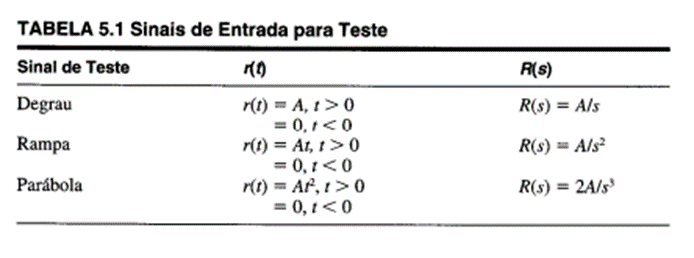

A função impulso unitário também é útil para fins de sinal de teste. O impulso unitário se baseia em uma função retangular f.(t) tal que

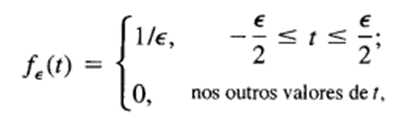



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

<ipython-input-16-2f542875937a>:6: RuntimeWarning: invalid value encountered in double_scalars
  if (x[i]/abs(x[i])) < 0:


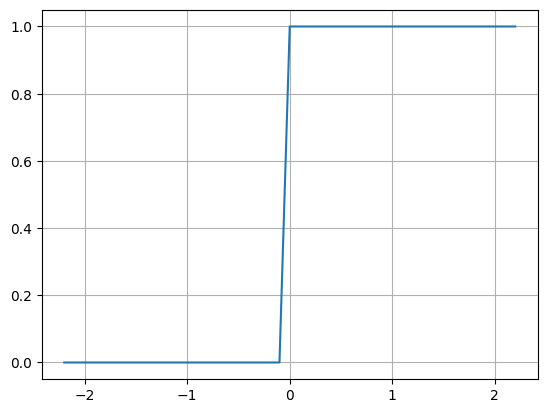

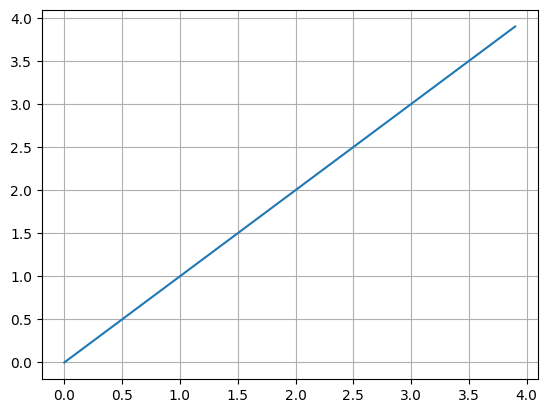

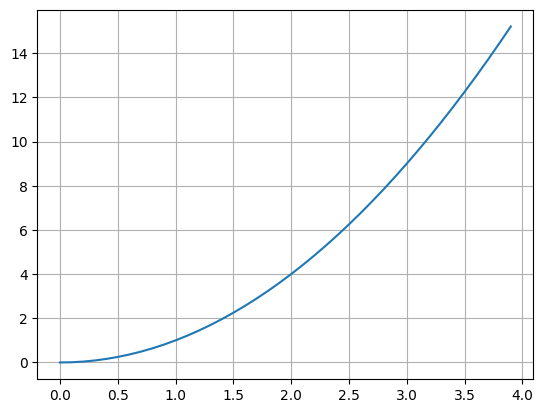

In [ ]:
x = np.arange(-2.2,2.3,0.1).round(2)
x2 = np.arange(0,4,0.1).round(2)
y = np.copy(x)

for i in range(len(x)):
  if (x[i]/abs(x[i])) < 0:
    y[i] = 0
  else:
    y[i] = 1


plt.grid()
plt.plot(x,y)
plt.show()

plt.grid()
plt.plot(x2,x2)
plt.show()
plt.grid()

plt.plot(x2,x2**2)


###**5.3 Desempenho de um Sistema de Segunda Ordem**

Tomamos o seguinte sistema de controle com retroação a malha fechada

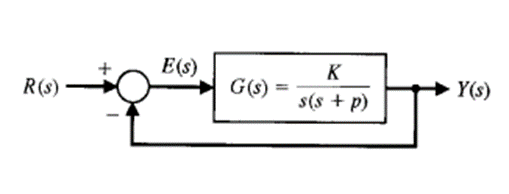

Ele possui a saída de

$Y(s)=\frac{G(s)}{1+G(s)}R(s) = \frac{K}{s^2+os+K}R(s)$

A resposta transitória a uma função de entrada em impulso é

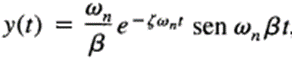

que é simplesmente a derivada da resposta a uma entrada em degrau.

Medidas de desempenho padronizadas são definidas usualmente em termos da resposta do sistema ao degrau. A rapidez da resposta é medida pelo tempo de subida, e pelo tempo de pico.

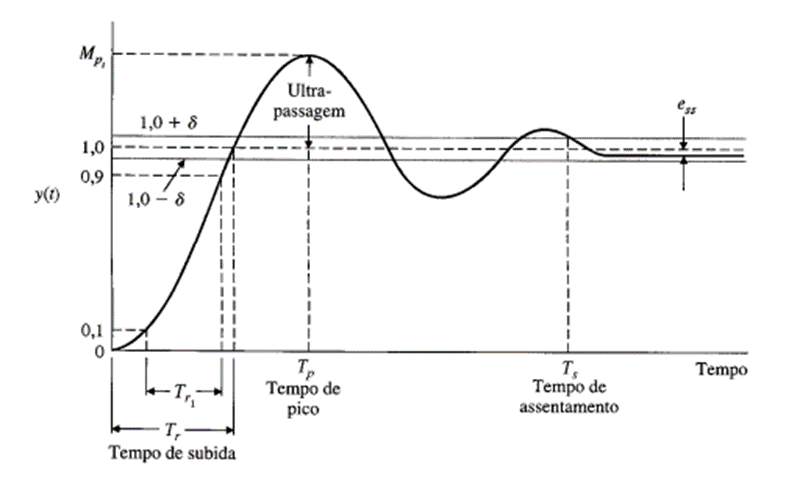

O tempo de assentamento (ou tempo de acomodação), T5 , é definido como o tempo requerido para a resposta do sistema permanecer com valores no interior de uma certa faixa percentual, 8, da amplitude de entrada.

Para o sistema de segunda ordem com constante de amortecimento a malha fechada, busca-se determinar o tempo para o qual os valores da resposta permanecem no interior de uma faixa de 2% em tomo do valor final. Isto ocorre, aproximadamente, quando

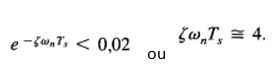

A rapidez de uma resposta a uma excitação em degrau é descrita como:

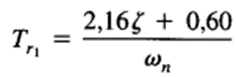

A rapidez de resposta, contudo, estará limitada pelo valor de ultrapassagem que pode ser aceito.

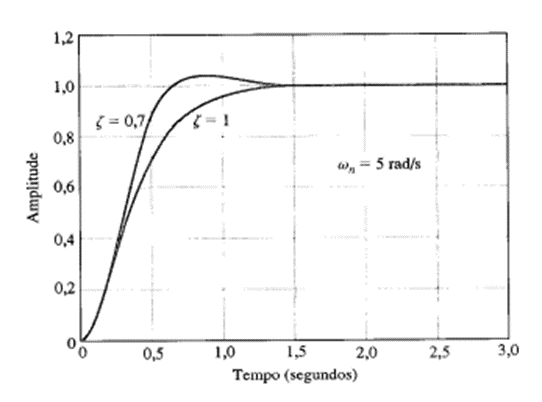



####**EXEMPLOS**

A seguir temos um exemplo de aplicação onde o fator de ζ está definido na legenda

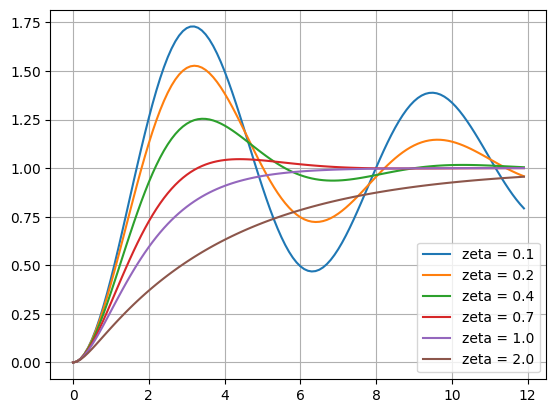

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

t = np.arange(0,12,0.1)
num = np.array([1])

zeta1 = 0.1
zeta2 = 0.2
zeta3 = 0.4
zeta4 = 0.7
zeta5 = 1.0
zeta6 = 2.0

den1 = [1, 2*zeta1, 1]
den2 = [1, 2*zeta2, 1]
den3 = [1, 2*zeta3, 1]
den4 = [1, 2*zeta4, 1]
den5 = [1, 2*zeta5, 1]
den6 = [1, 2*zeta6, 1]

sys1 = signal.TransferFunction(num, den1)
sys2 = signal.TransferFunction(num, den2)
sys3 = signal.TransferFunction(num, den3)
sys4 = signal.TransferFunction(num, den4)
sys5 = signal.TransferFunction(num, den5)
sys6 = signal.TransferFunction(num, den6)

y1,t1 = signal.step(sys1, X0 = 0, T=t)
y2,t2 = signal.step(sys2, X0 = 0, T=t)
y3,t3 = signal.step(sys3, X0 = 0, T=t)
y4,t4 = signal.step(sys4, X0 = 0, T=t)
y5,t5 = signal.step(sys5, X0 = 0, T=t)
y6,t6 = signal.step(sys6, X0 = 0, T=t)


plt.plot(y1,t1, label='zeta = 0.1')
plt.plot(y2,t2, label='zeta = 0.2')
plt.plot(y3,t3, label='zeta = 0.4')
plt.plot(y4,t4, label='zeta = 0.7')
plt.plot(y5,t5, label='zeta = 1.0')
plt.plot(y6,t6, label='zeta = 2.0')

plt.grid()
plt.legend()
plt.show()

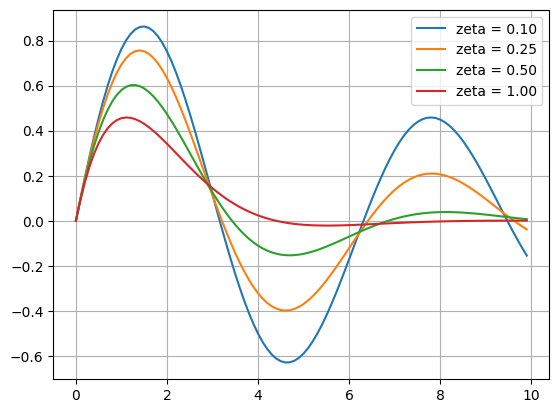

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

t2 = np.arange(0,10,0.1)

zeta2_1 = 0.10
zeta2_2 = 0.25
zeta2_3 = 0.50
zeta2_4 = 1.00

den2_1 = [1, 2*zeta2_1, 1]
den2_2 = [1, 2*zeta2_2, 1]
den2_3 = [1, 2*zeta2_3, 1]
den2_4 = [1, 2*zeta2_4, 1]

sys2_1 = signal.TransferFunction(num, den2_1)
sys2_2 = signal.TransferFunction(num, den2_2)
sys2_3 = signal.TransferFunction(num, den2_3)
sys2_4 = signal.TransferFunction(num, den2_4)


y2_1,t2_1 = signal.impulse(sys1, X0 = 0, T=t2)
y2_2,t2_2 = signal.impulse(sys2, X0 = 0, T=t2)
y2_3,t2_3 = signal.impulse(sys3, X0 = 0, T=t2)
y2_4,t2_4 = signal.impulse(sys4, X0 = 0, T=t2)

plt.plot(y2_1,t2_1, label='zeta = 0.10')
plt.plot(y2_2,t2_2, label='zeta = 0.25')
plt.plot(y2_3,t2_3, label='zeta = 0.50')
plt.plot(y2_4,t2_4, label='zeta = 1.00')

plt.grid()
plt.legend()
plt.show()

Para um dado ωn, a resposta é tão mais rápida quão menor for o valor de ζ:

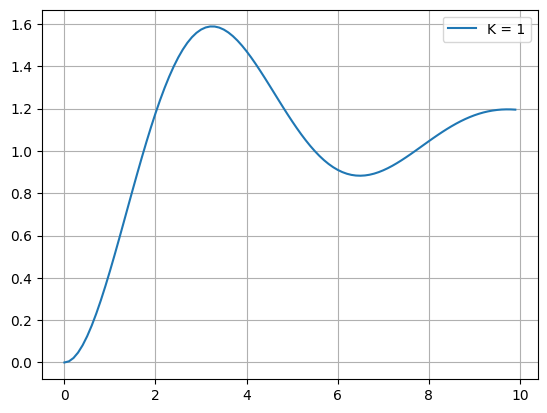

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

t_t = np.arange(0,10,0.1)
num2 = [1.1]

zeta3 = 1

den3 = [1, (1/2)*zeta3, 1]

sys3 = signal.TransferFunction(num2, den3)

y3,t3 = signal.step(sys3, T=t_t)

plt.plot(y3,t3, label='K = 1')
plt.grid()
plt.legend()
plt.show()

###**5.4 Efeitos de um Terceiro Pólo e de um Zero na Resposta de um Sistema de Segunda Ordem**


Muitos sistemas possuem um par de raízes dominantes e a resposta ao degrau pode ser estimada. Esta abordagem, embora seja uma aproximação, evita o cálculo da transformada inversa de Laplace a fim de se determinar a ultrapassagem percentual e outras medidas de desempenho.

A resposta de um sistema de terceira ordem pode ser aproximada pelas raízes dominantes do sistema de segunda ordem quando a parte real das raízes dominantes for inferior a 1/10 da parte real da terceira raiz.

Observemos a resposta transitória real para uma entrada em degrau, com a resposta real para os valores selecionados na tabela seguinte:

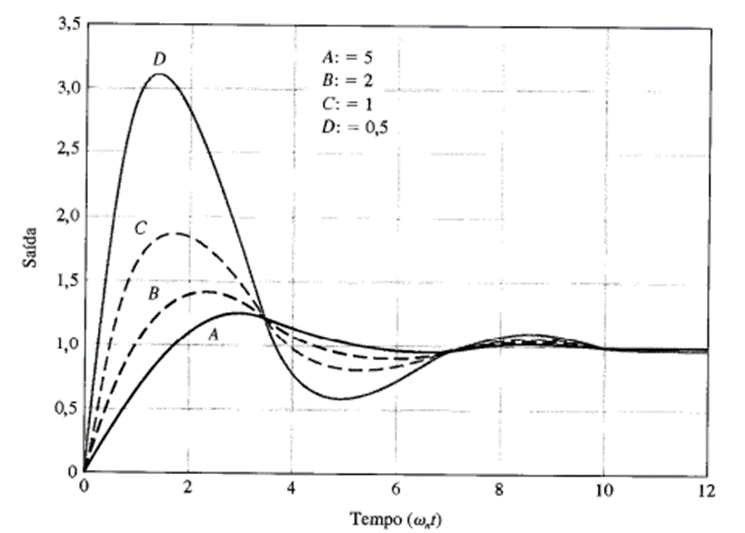

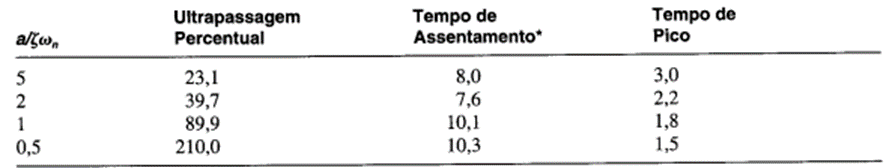

A correlação da resposta de um sistema no domínio do tempo com a localização no plano s dos polos da função de transferência a malha fechada é muito útil para se selecionar as especificações de um sistema.

###**5.5 Estimativa da Relação de Amortecimento**

A relação de amortecimento pode ser calculada a partir da resposta do sistema a uma excitação em degrau. A resposta ao degrau de um sistema de segunda ordem para uma entrada em degrau unitário é dada pela seguinte equação

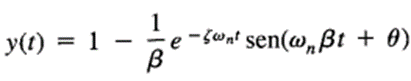

Para o sistema de segunda ordem a resposta ao degrau permanece no interior da faixa de 2% do valor de estado estacionário após quatro constantes de tempo (47). Portanto n = 4, e

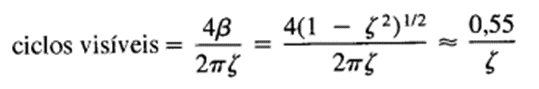

###**5.6 Localização das Raízes no Plano s e a Resposta Transitória**

A resposta transitória de um sistema de controle com retroação a malha fechada pode ser descrita em termos da localização dos polos da função de transferência. A função de transferência a malha fechada é escrita em geral pela seguinte equação, onde Δ(s) = O é a equação característica do sistema:

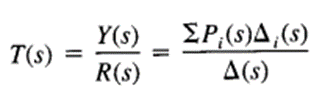

É importante para o analista de sistemas de controle compreender a relação entre a representação em frequências complexas de um sistema linear, através dos polos e zeros de sua função de transferência, e sua resposta no domínio do tempo ao degrau e a outras entradas.

Um projetista experiente presta atenção aos efeitos das localizações de zeros sobre a resposta do sistema. Os polos de T(s) determinam os modos particulares de resposta e os zeros de T(s) estabelecem os pesos relativos das funções correspondentes aos modos individuais. Por exemplo, deslocar um zero para perto de um polo específico reduzirá a contribuição relativa da função modal correspondente ao polo.


###**5.7 Erro de Estado Estacionário de Sistemas de Controle com Retroação**

Uma das razões fundamentais de se usar retroação, a despeito de seu custo e do aumento de complexidade, é a melhoria imediata na redução do erro de regime permanente do sistema. O erro de regime permanente (estado estacionário) de um sistema a malha fechada estável é usualmente muitas ordens de magnitude menor que o erro do sistema a malha aberta.

**Entrada em Degrau:** O erro de estado estacionário para uma entrada em degrau de magnitude A é, portanto:

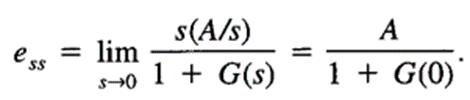

é a forma da função de transferência de malha aberta G(s) que determina o erro de estado estacionário.

**Entrada em Rampa:** O erro de estado estacionário para uma entrada em rampa (velocidade) com inclinação A é dado pela seguinte equação, a qual o erro estacionário depende do número de integrações N:

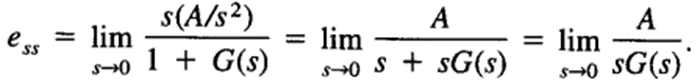

**Entrada em Aceleração:** Quando o sinal de entrada do sistema for $r(t) = \frac{At^2}{2}$, o erro de estado estacionário será:

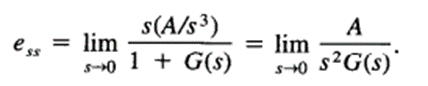


###**5.8 Erro de Estado Estacionário de Sistemas com Retroação Não-Unitária**


Para um sistema no qual a retroação seja não-unitária, as unidades da saída, Y(s), são usualmente diferentes da saída do sensor. Em geral, sempre se pode determinar o erro real do sistema usando-se a seguinte equação:

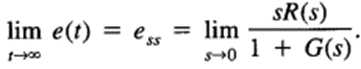

###**5.9 Índices de Desempenho**

A teoria de controle moderna supõe que o engenheiro de sistemas possa especificar quantitativamente o desempenho requerido do sistema. Por conseguinte, um índice de desempenho pode ser calculado e usado para se medir o desempenho do sistema.

Um índice de desempenho adequado é a integral do quadrado do erro, ISE (Integral of the Square of the Error), que é definido como

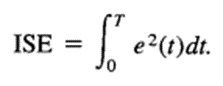

O limite superior T é um tempo finito escolhido um tanto arbitrariamente, de modo que a integral tenda a um valor estacionário. É usualmente conveniente escolher T como o tempo de assentamento, $T_s$. Este critério irá discriminar sistemas excessivamente superamortecidos de sistemas excessivamente subamortecidos. O valor mínimo da integral ocorrerá para um valor de compromisso do amortecimento.


###**5.10 A Simplificação de Sistemas Lineares**

É bastante útil estudar sistemas complexos com funções de transferência de ordem elevada usando modelos aproximados de ordem mais baixa. Por exemplo, um sistema de quarta ordem poderia ser aproximado por um sistema de segunda ordem conduzindo ao uso dos índices de desempenho.

Uma maneira relativamente simples para eliminar um determinado polo sem importância é observar o polo que tenha parte real negativa muito maior que a dos outros polos. Espera-se assim que esse polo afete a resposta transitória de modo insignificante.

Por exemplo, se se tiver um processo onde

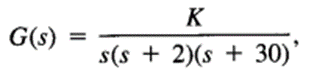

é possível, com toda a certeza, desconsiderar o impacto do polo em s = - 30. Contudo, deve-se observar a resposta em estado estacionário do sistema e, desta maneira, reduzir o sistema para

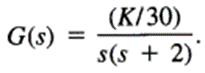

###**5.11 Exemplo de Projeto: Controle de Posicionamento do Telescópio Hubble**

Considere-se o modelo de sistema de posicionamento do telescópio mostrado a seguir

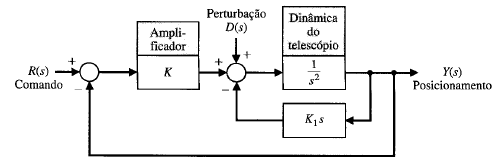

O objetivo do projeto é escolher  𝐾1  e  𝐾  de que a ultrapassagem percentual da saída a um comando em degrau, r(t), seja menor ou igual a 10%, o erro de estado estacionário a um comando de rampa seja minimizado, e o efeito de uma pertubação em degrau seja reduzido. Como o sistema tem uma malha interna, a redução de diagrama de blocos pode ser usada para obter o sistema simplificado abaixo

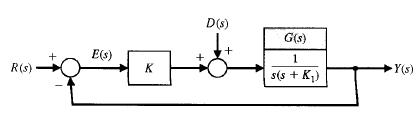

image.png

onde

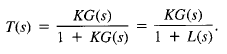

O erro E(s) é

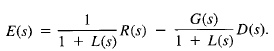

Primeiro, seja seleciona  𝐾  e  𝐾1  para alcançar o requisito de ultrapassagem percentual exigida para uma entrada em degrau, R(s) = A/s. Fazendo D(s) = 0, tem-se

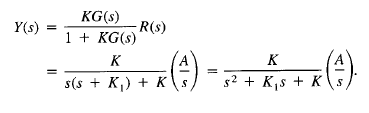

Determinando que a ultrapassagem será de 9,5% para  𝜁  = 0,6. Em seguida examinamos o erro de estado estacionário para uma rampa, r(t) =  𝐵𝑡 , t  ≥  0,

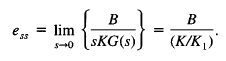

Em resumo, busca-se um grande valor de  𝐾  e um grande valor de ( 𝐾/𝐾1)  para obter um erro de estado estacionário pequeno para uma entrada em rampa. Entretando, precisa-se de  𝜁  = 0,6 para limitar a ultrapassagem.
Para o projeto em pauta, precisa-se selecionar  𝐾 . A equação característica do sistema é

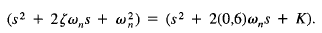

Portanto, $\omega_n$ = $\sqrt{K}$, e o segundo termo do denominador requer $K_1$ = 2(0,6)$\omega_n$. Então, $K_1 = 1,2\sqrt{K}$, ou a relação $K/K_1$, se torna

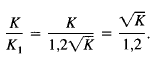

As respostas do sistema a uma entrada em degrau estão mostradas no gráfico abaixo





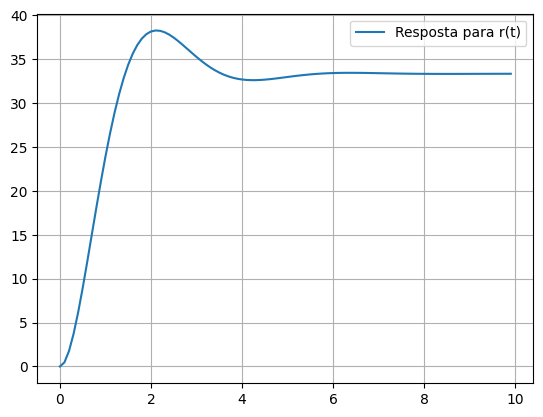

In [ ]:
t3 = np.arange(0,10,0.1)
num2 = [100]

zeta3 = 0.6

den3 = [1, 3*zeta3, 3]

sys3 = signal.TransferFunction(num2, den3)

y3,t_3 = signal.step(sys3, X0 = 0, T=t3)

plt.plot(y3,t_3, label='Resposta para r(t)')
plt.grid()
plt.legend()
plt.show()

###**5.12 Desempenho do Sistema Usando Python**

Nesta seção serão investigadas as especificações de desempenho no domínio de tempo fornecidas em termos de resposta transitória a um dado sinal de entrada e os erros de acompanhamento resultantes em estado estacionário.

Como os sinais de entrada são geralmente desconhecidos, é usado um sinal de teste padronizado como entrada. Considere-se o sistema de segunda ordem

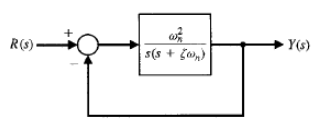

A saída a malha fechada é

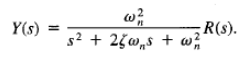

####**EXEMPLOS**

Considere-se um sistema de terceira ordem

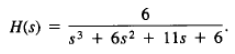

Uma aproximação de segunda ordem é

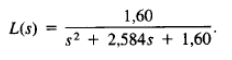

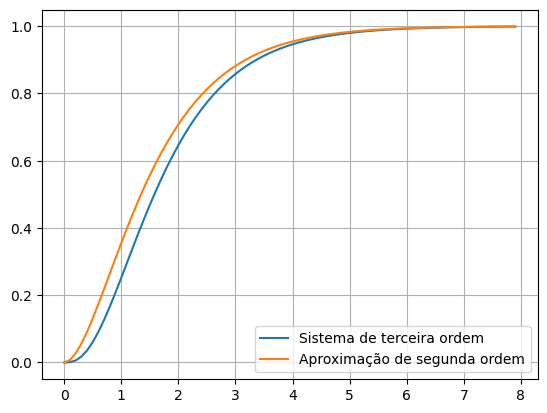

In [ ]:
#Comparação de respostas ao grau

t_s = np.arange(0,8,0.1)
numS1 = [6]
numS2 = [1.6]

denS1 = [1, 6, 11, 6]
denS2 = [1, 2.594, 1.6]
sysS1 = signal.TransferFunction(numS1, denS1)
sysS2 = signal.TransferFunction(numS2, denS2)
yS1,tS1 = signal.step(sysS1, X0 = 0, T=t_s)
yS2,tS2 = signal.step(sysS2, X0 = 0, T=t_s)

plt.plot(yS1,tS1, label='Sistema de terceira ordem')
plt.plot(yS2,tS2, label='Aproximação de segunda ordem')
plt.legend()
plt.grid()
plt.show()